In [32]:
# Rachit Manandhar
# 2501387
# np03cs4a240053

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 3. Regression Task (California Housing)

## Task 1: Load and Split Dataset

### Loading the Dataset:

In [34]:
# Setting the columns 
cols = ["longitude", "latitude", "housingMedianAge", "totalRooms", "totalBedrooms", "population", "households", "medianIncome", "medianHouseValue"]

# Loading the dataset by downloading from "https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/5976036/cal_housing.tgz"
df = pd.read_csv("cal_housing.data", header=None, names=cols)

# Spliting the data into features and label
X = df.drop("medianHouseValue", axis = 1)
y = df["medianHouseValue"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)

Training samples: (16512, 8)
Test samples: (4128, 8)


## Task 2: 

### 2.1:

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression")
print("Train MSE:", lr_train_mse)
print("Test MSE:", lr_test_mse)

print("Coefficients:", lr.coef_)

Baseline Linear Regression
Train MSE: 4811134397.884198
Test MSE: 4918556441.477801
Coefficients: [-4.26323917e+04 -4.24500719e+04  1.18280965e+03 -8.18797708e+00
  1.16260128e+02 -3.84922131e+01  4.63425720e+01  4.05384044e+04]


### 2.2:

In [36]:
# Ridge hyperparameter tuning
ridge = Ridge()

alpha_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(ridge, alpha_grid, scoring='neg_mean_squared_error', cv = 5)

ridge_cv.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_cv.best_params_)

Best Ridge alpha: {'alpha': 10}


In [37]:
best_ridge = ridge_cv.best_estimator_

# Evaluate Ridge
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, y_train_pred)
ridge_test_mse = mean_squared_error(y_test, y_test_pred)
print("Ridge Train MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)

Ridge Train MSE: 4811139082.000713
Ridge Test MSE: 4918567284.46597


In [38]:
lasso = Lasso(max_iter=10000)

lasso_cv = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv = 5)

lasso_cv.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_cv.best_params_)

Best Lasso alpha: {'alpha': 10}


In [39]:
best_lasso = lasso_cv.best_estimator_

# Evaluate Lasso
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

lasso_train_mse = mean_squared_error(y_train, y_train_pred)
lasso_test_mse = mean_squared_error(y_test, y_test_pred)
print("Lasso Train MSE:", lasso_train_mse)
print("Lasso Test MSE:", lasso_test_mse)

Lasso Train MSE: 4811135093.259237
Lasso Test MSE: 4918555581.562368


### 2.3:

            Feature    Ridge Coef    Lasso Coef
0         longitude -42535.627082 -42595.282794
1          latitude -42359.666504 -42415.402048
2  housingMedianAge   1184.351988   1183.328980
3        totalRooms     -8.196936     -8.191118
4     totalBedrooms    116.124492    116.204998
5        population    -38.496151    -38.493803
6        households     46.569026     46.430671
7      medianIncome  40543.565513  40540.088671

Performance Comparison:
Model      Train MSE       Test MSE       

Baseline   4811134397.884198 4918556441.477801
Ridge      4811139082.000713 4918567284.465970
Lasso      4811135093.259237 4918555581.562368


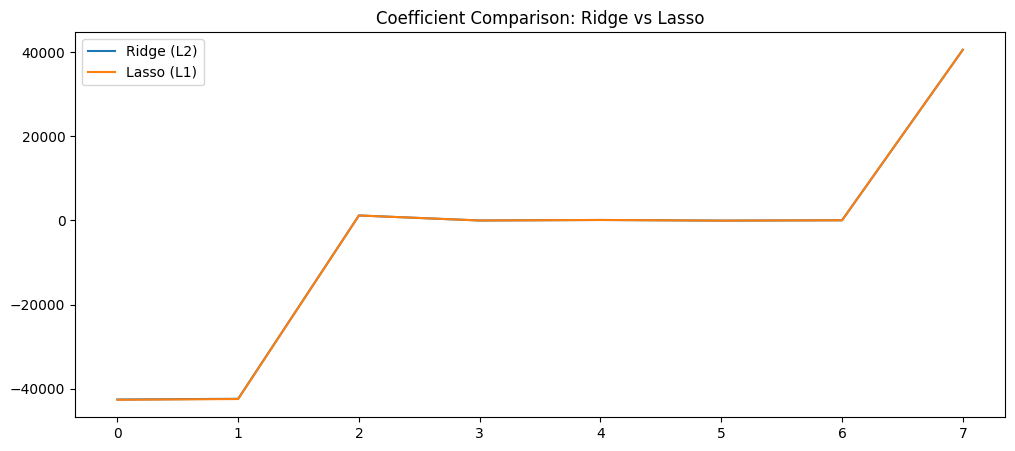

In [40]:
coef_comparison = pd.DataFrame({
    "Feature": X.columns,
    "Ridge Coef": best_ridge.coef_,
    "Lasso Coef": best_lasso.coef_
})

print(coef_comparison)

print(f"\nPerformance Comparison:")
print(f"{'Model':<10} {'Train MSE':<15} {'Test MSE':<15}")
print()
print(f"{'Baseline':<10} {lr_train_mse:<15.6f} {lr_test_mse:<15.6f}")
print(f"{'Ridge':<10} {ridge_train_mse:<15.6f} {ridge_test_mse:<15.6f}")
print(f"{'Lasso':<10} {lasso_train_mse:<15.6f} {lasso_test_mse:<15.6f}")


plt.figure(figsize=(12,5))
plt.plot(best_ridge.coef_, label="Ridge (L2)")
plt.plot(best_lasso.coef_, label="Lasso (L1)")
plt.legend()
plt.title("Coefficient Comparison: Ridge vs Lasso")
plt.show()

# 4. Classification Task (Breast Cancer)

## Task 1: Load and Split Dataset

In [41]:
from sklearn.datasets import load_breast_cancer

In [42]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)

Training samples: (455, 30)
Test samples: (114, 30)


## Task 2:

### 1.

In [43]:
# Baseline Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Accuracy
print("Baseline Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Coefficients
print("Coefficients:", log_reg.coef_)

Baseline Logistic Regression
Train Accuracy: 0.9626373626373627
Test Accuracy: 0.956140350877193
Coefficients: [[ 0.98208299  0.22519686 -0.36688444  0.0262268  -0.15507824 -0.22867976
  -0.52338614 -0.2793554  -0.22391176 -0.03605388 -0.09476544  1.39135347
  -0.16429246 -0.08903006 -0.02250974  0.04944847 -0.04186075 -0.03193634
  -0.03298528  0.01189208  0.10400464 -0.51389384 -0.01711567 -0.01662253
  -0.30695364 -0.75341491 -1.41533107 -0.50382259 -0.73542849 -0.09913574]]


### 2.

In [56]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}
log_cv = GridSearchCV(log_reg, param_grid, scoring = 'accuracy', cv = 5)
log_cv.fit(X_train, y_train)

print("Best Parameters:", log_cv.best_params_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [49]:
best_log = log_cv.best_estimator_

y_train_pred = best_log.predict(X_train)
y_test_pred = best_log.predict(X_test)

print("Tuned Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Tuned Logistic Regression
Train Accuracy: 0.9692307692307692
Test Accuracy: 0.956140350877193


In [59]:
# L1 Logistic Regression
log_l1 = LogisticRegression(C=log_cv.best_params_['C'], l1_ratio = 1.0, solver='liblinear', max_iter=10000)
log_l1.fit(X_train, y_train)

# L2 Logistic Regression
log_l2 = LogisticRegression(C=log_cv.best_params_['C'], l1_ratio = 0.0, solver='liblinear', max_iter=10000)
log_l2.fit(X_train, y_train)

print("L1 Train Accuracy:", accuracy_score(y_train, log_l1.predict(X_train)))
print("L1 Test Accuracy:", accuracy_score(y_test, log_l1.predict(X_test)))

print("L2 Train Accuracy:", accuracy_score(y_train, log_l2.predict(X_train)))
print("L2 Test Accuracy:", accuracy_score(y_test, log_l2.predict(X_test)))

L1 Train Accuracy: 0.9824175824175824
L1 Test Accuracy: 0.9736842105263158
L2 Train Accuracy: 0.9692307692307692
L2 Test Accuracy: 0.956140350877193


## 3.

In [60]:
# Coefficients
coeff_l1 = pd.Series(log_l1.coef_[0], index=load_breast_cancer().feature_names)
coeff_l2 = pd.Series(log_l2.coef_[0], index=load_breast_cancer().feature_names)

print("L1 coefficients:")
print(coeff_l1)

print("\nL2 coefficients:")
print(coeff_l2)

# Count number of non-zero coefficients
print("\nNon-zero L1 coefficients:", np.sum(coeff_l1 != 0))
print("Non-zero L2 coefficients:", np.sum(coeff_l2 != 0))

L1 coefficients:
mean radius                 1.643271
mean texture                0.179620
mean perimeter             -0.051568
mean area                  -0.011643
mean smoothness             0.000000
mean compactness            0.000000
mean concavity              0.000000
mean concave points       -14.210292
mean symmetry               0.000000
mean fractal dimension      0.000000
radius error                0.000000
texture error               3.221484
perimeter error            -0.874976
area error                 -0.091484
smoothness error            0.000000
compactness error           0.000000
concavity error             2.468309
concave points error        0.000000
symmetry error              0.000000
fractal dimension error     0.000000
worst radius                0.871757
worst texture              -0.600484
worst perimeter             0.135730
worst area                 -0.026988
worst smoothness            0.000000
worst compactness           0.000000
worst concavity      

In [61]:
print("Accuracy Comparison: ")
results = pd.DataFrame({
    'Model': ['L1', 'L2'],
    'Train Accuracy': [
        accuracy_score(y_train, log_l1.predict(X_train)),
        accuracy_score(y_train, log_l2.predict(X_train))
    ],
    'Test Accuracy': [
        accuracy_score(y_test, log_l1.predict(X_test)),
        accuracy_score(y_test, log_l2.predict(X_test))
    ]
})

print(results)

Accuracy Comparison: 
  Model  Train Accuracy  Test Accuracy
0    L1        0.982418       0.973684
1    L2        0.969231       0.956140


Discussion:
1. L1 produces sparse coefficients (feature selection)
2. L2 shrinks all coefficients but rarely zero
3. Regularization reduces variance and mitigates overfitting
4. Overly strong regularization may increase bias

### Optional:

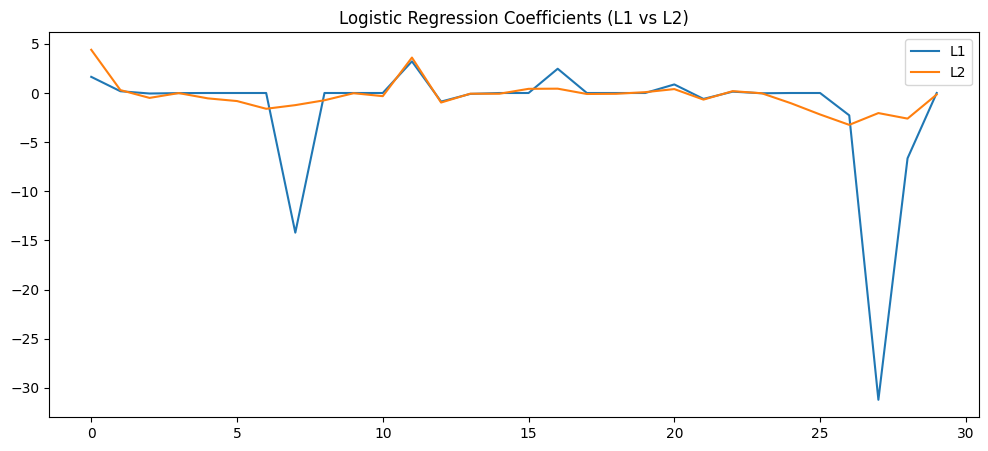

In [62]:
plt.figure(figsize=(12,5))

plt.plot(log_l1.coef_[0], label="L1")
plt.plot(log_l2.coef_[0], label="L2")

plt.legend()
plt.title("Logistic Regression Coefficients (L1 vs L2)")
plt.show()